In [ ]:
# Stock market Analysis for AMAZON (AMZN)
# Import necessary libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from keras.utils import plot_model
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
# Reading the Amazon stock data from yfinance

stock_AMZN = 'AMZN'
stock_data = yf.download(stock_AMZN, start='2013-01-01', end='2023-01-01')

# To show, describe and give the necessary information about the stock data
print(stock_data)
print(stock_data.describe())
print(stock_data.info())
print(stock_data.columns)

[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2013-01-02  12.804000  12.905000  12.663000  12.865500  12.865500  65420000
2013-01-03  12.863500  13.044000  12.818500  12.924000  12.924000  55018000
2013-01-04  12.879000  12.990000  12.832500  12.957500  12.957500  37484000
2013-01-07  13.148500  13.486500  13.133500  13.423000  13.423000  98200000
2013-01-08  13.353500  13.449000  13.178500  13.319000  13.319000  60214000
...               ...        ...        ...        ...        ...       ...
2022-12-23  83.250000  85.779999  82.930000  85.250000  85.250000  57433700
2022-12-27  84.970001  85.349998  83.000000  83.040001  83.040001  57284000
2022-12-28  82.800003  83.480003  81.690002  81.820000  81.820000  58228600
2022-12-29  82.870003  84.550003  82.550003  84.180000  84.180000  54995900
2022-12-30  83.1200

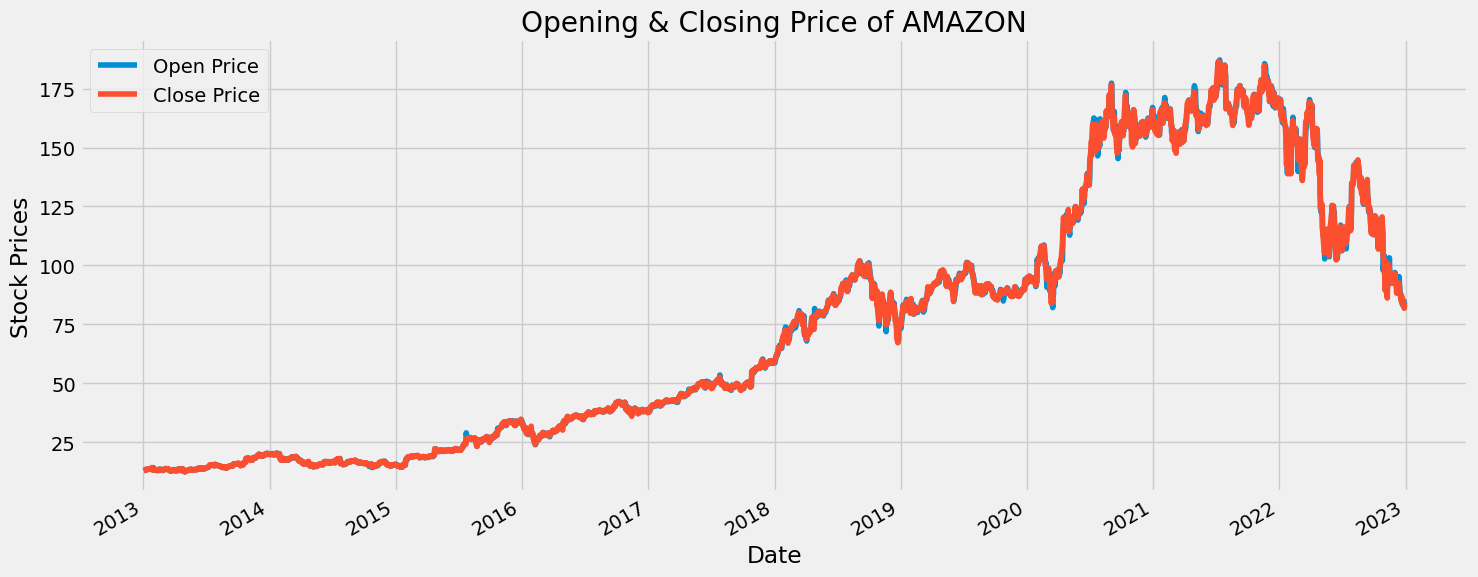

In [ ]:
# More exploration by plotting the opening stock prices against the closing stock prices

plt.figure(figsize=(15, 6))
stock_data['Open'].plot()
stock_data['Close'].plot()
plt.ylabel('Stock Prices')
plt.xlabel('Date')
plt.title("Opening & Closing Price of AMAZON")
plt.legend(['Open Price', 'Close Price'])
plt.tight_layout()
plt.show()

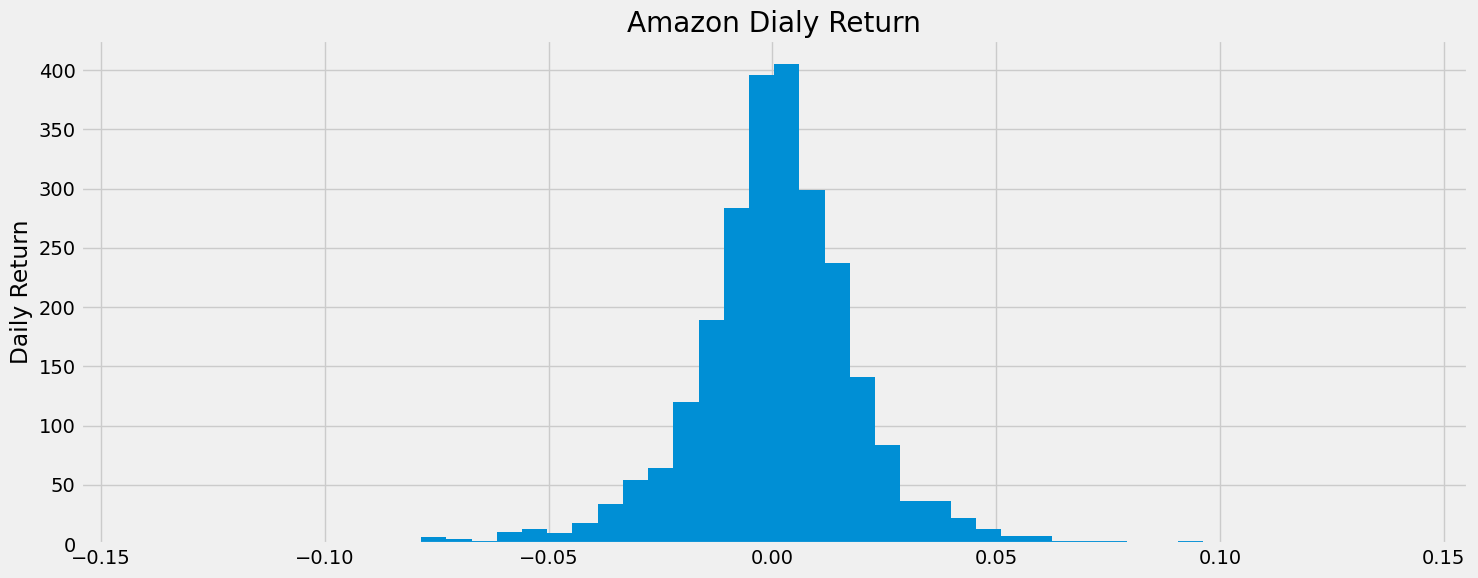

In [ ]:
# The percent change for each day return of Amazon's stock price
plt.figure(figsize=(15, 6))
stock_data['Adj Close'].pct_change().hist(bins=50)
plt.ylabel('Daily Return')
plt.title(f'Amazon Dialy Return')
plt.tight_layout()
plt.show()

In [ ]:

## processing the data by making the column 'Close' as index

stockDF = stock_data.reset_index()['Close']

stockDF


0       12.865500
1       12.924000
2       12.957500
3       13.423000
4       13.319000
          ...    
2513    85.250000
2514    83.040001
2515    81.820000
2516    84.180000
2517    84.000000
Name: Close, Length: 2518, dtype: float64

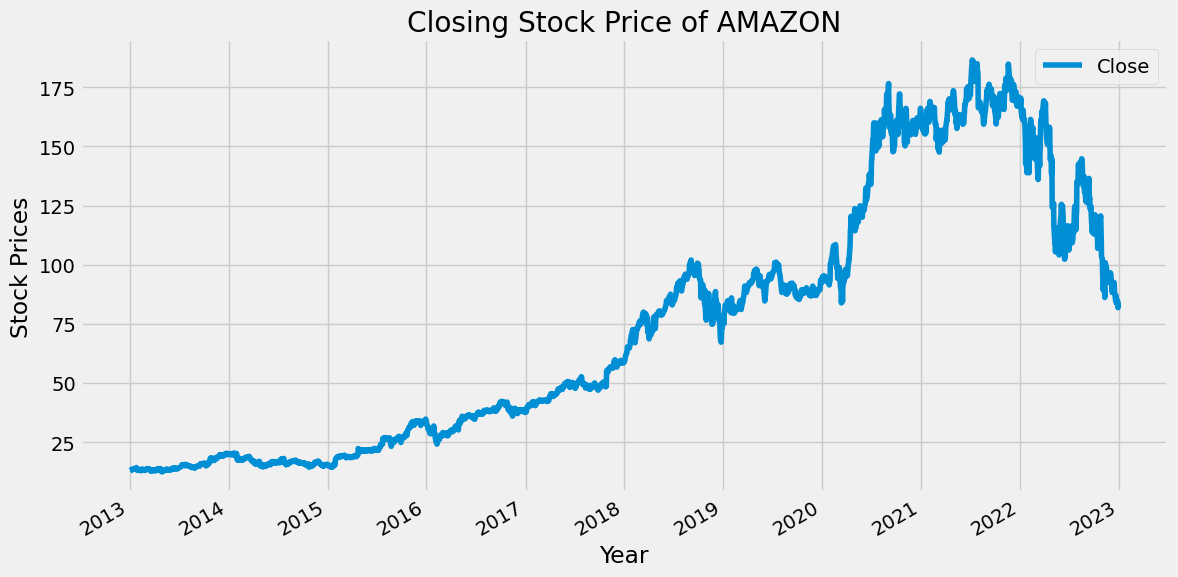

In [ ]:
# Plotting the closing stock price

plt.figure(figsize=(12, 6))
stock_data['Close'].plot()
plt.ylabel('Stock Prices')
plt.xlabel('Year')
plt.title("Closing Stock Price of AMAZON")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Preprocess the data by normalizing it
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1,1))
# Create the time series data structure
look_back = 60
train_size = int(len(scaled_data) * 0.80)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - look_back:]

train_generator = TimeseriesGenerator(train_data, train_data,
                                     length=look_back, batch_size=20)
test_generator = TimeseriesGenerator(test_data, test_data,
                                     length=look_back, batch_size=1)



In [ ]:
# Build the LSTM model for the analysis
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True,
                    input_shape=(look_back, 1)))
lstm_model.add(LSTM(units=100,return_sequences = True))
lstm_model.add(LSTM(units=100))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics= 'mean_absolute_error' )
lstm_model.fit(train_generator, epochs=86)

Epoch 1/86
98/98 [==============================] - 17s 112ms/step - loss: 0.0053 - mean_absolute_error: 0.0469
Epoch 2/86
98/98 [==============================] - 11s 111ms/step - loss: 0.0071 - mean_absolute_error: 0.0599
Epoch 3/86
98/98 [==============================] - 12s 118ms/step - loss: 8.8432e-04 - mean_absolute_error: 0.0191
Epoch 4/86
98/98 [==============================] - 11s 113ms/step - loss: 4.3108e-04 - mean_absolute_error: 0.0139
Epoch 5/86
98/98 [==============================] - 11s 112ms/step - loss: 6.0489e-04 - mean_absolute_error: 0.0173
Epoch 6/86
98/98 [==============================] - 10s 107ms/step - loss: 0.0011 - mean_absolute_error: 0.0213
Epoch 7/86
98/98 [==============================] - 11s 111ms/step - loss: 6.1667e-04 - mean_absolute_error: 0.0161
Epoch 8/86
98/98 [==============================] - 11s 112ms/step - loss: 7.4113e-04 - mean_absolute_error: 0.0181
Epoch 9/86
98/98 [==============================] - 10s 97ms/step - loss: 0.0013 - m

In [ ]:
#Viewing the layers, shape and total parameters in the model
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 60, 100)           60400     
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 151301 (591.02 KB)
Trainable params: 151301 (591.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


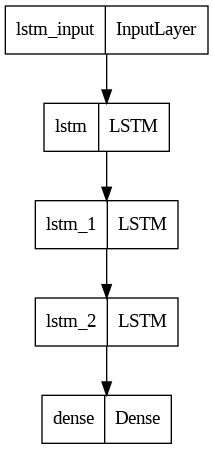

In [ ]:
plot_model(lstm_model)

Epoch 1/5
98/98 [==============================] - 11s 111ms/step - loss: 1.6392e-04 - mean_absolute_error: 0.0090
Epoch 2/5
98/98 [==============================] - 10s 98ms/step - loss: 1.7614e-04 - mean_absolute_error: 0.0094
Epoch 3/5
98/98 [==============================] - 11s 109ms/step - loss: 9.9585e-05 - mean_absolute_error: 0.0064
Epoch 4/5
98/98 [==============================] - 11s 110ms/step - loss: 1.1966e-04 - mean_absolute_error: 0.0075
Epoch 5/5
98/98 [==============================] - 9s 95ms/step - loss: 1.9103e-04 - mean_absolute_error: 0.0094


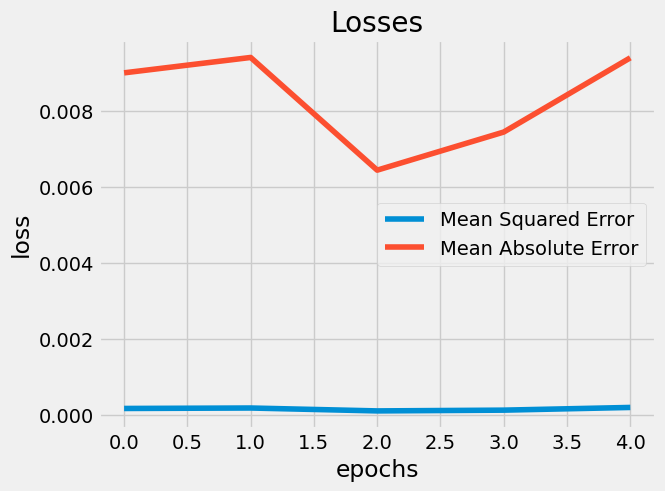

In [ ]:
# Model evaluation
history = lstm_model.fit(train_generator, epochs=5)

plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [ ]:
# Prediction of the test data
lstm_predictions = lstm_model.predict(test_generator)

# Invert predictions
lstm_predictions = scaler.inverse_transform(lstm_predictions)
actual_prices = scaler.inverse_transform(test_data[look_back:])

504/504 [==============================] - 14s 25ms/step


In [ ]:
#  Creating a DataFrame comparing actual stock prices with LSTM model predictions
comparision_DF= pd.DataFrame(actual_prices.flatten(), lstm_predictions.flatten())
comparision_DF

,0
163.287094,162.846497
161.775909,159.331497
158.836182,160.925507
159.026947,156.919006
156.703476,158.108002
...,...
84.551704,85.250000
84.508316,83.040001
83.601997,81.820000
82.349602,84.180000


In [ ]:
# Calculate The mean absolute error
mae = mean_absolute_error(actual_prices, lstm_predictions)
mae

2.889571038503495

In [ ]:
# Calculate the R-squared score
r_squared = r2_score(actual_prices, lstm_predictions)
r_squared

0.9808664432396963

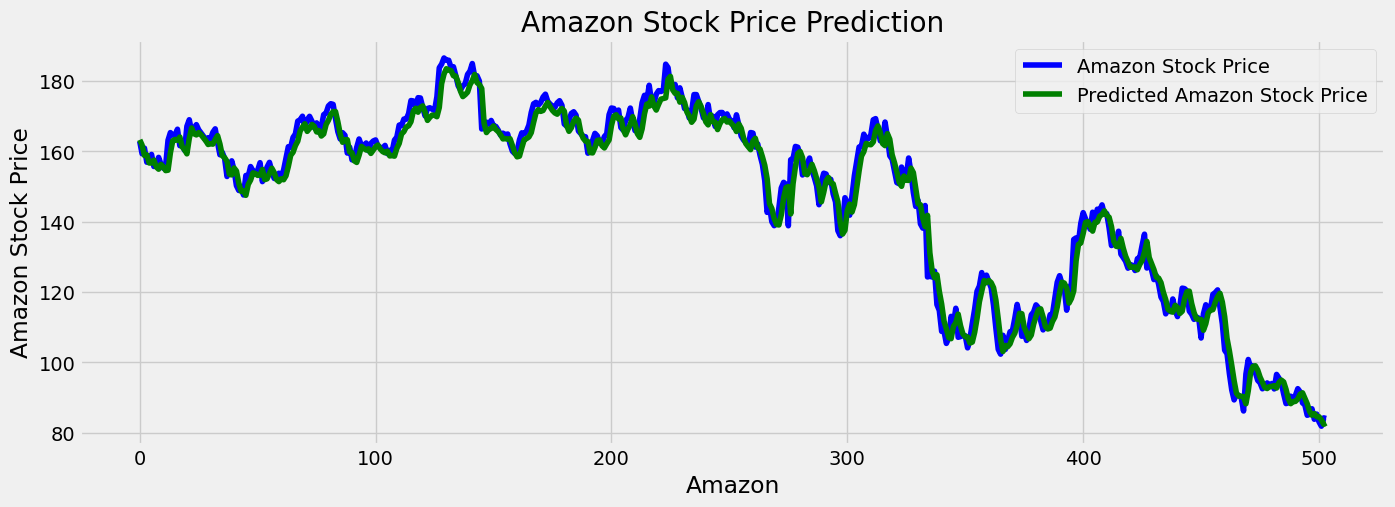

In [ ]:
# Plot the data
plt.figure(figsize=(15,5))
plt.plot(actual_prices, color='blue', label='Amazon Stock Price')
plt.plot(lstm_predictions, color='green', label='Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Amazon')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()

In [ ]:
# Forcasting the stock close price for the next 30 days

def predict_future_days(model, base_data, days_to_predict, scaler, look_back=2000):
    # Start with the last days of the base data
    input_data = base_data[-look_back:].reshape(1, look_back, 1)

    # Predict future days
    future_predictions = []

    for _ in range(days_to_predict):
        # Make a prediction
        prediction = model.predict(input_data)

        # Append the prediction
        future_predictions.append(prediction[0, 0])

        # Update the input data to include the prediction and exclude the oldest data point
        # Correctly reshape the prediction to (1, 1, 1) before appending
        input_data = np.append(input_data[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

    # Invert the scaling
    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

    return future_predictions


In [ ]:
# Predict next 30 days
days_to_predict = 30
future_days = predict_future_days(lstm_model, scaled_data, days_to_predict, scaler, look_back)

# Print and plot the predictions for the next 5 days
#print("Future predictions:", future_days)

1/1 [==============================] - 0s 64ms/step


<ipython-input-19-3400555e0e76>:2: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  predicted_dates = pd.date_range(start=stock_data.index[-1], periods=days_to_predict + 1, closed='right')


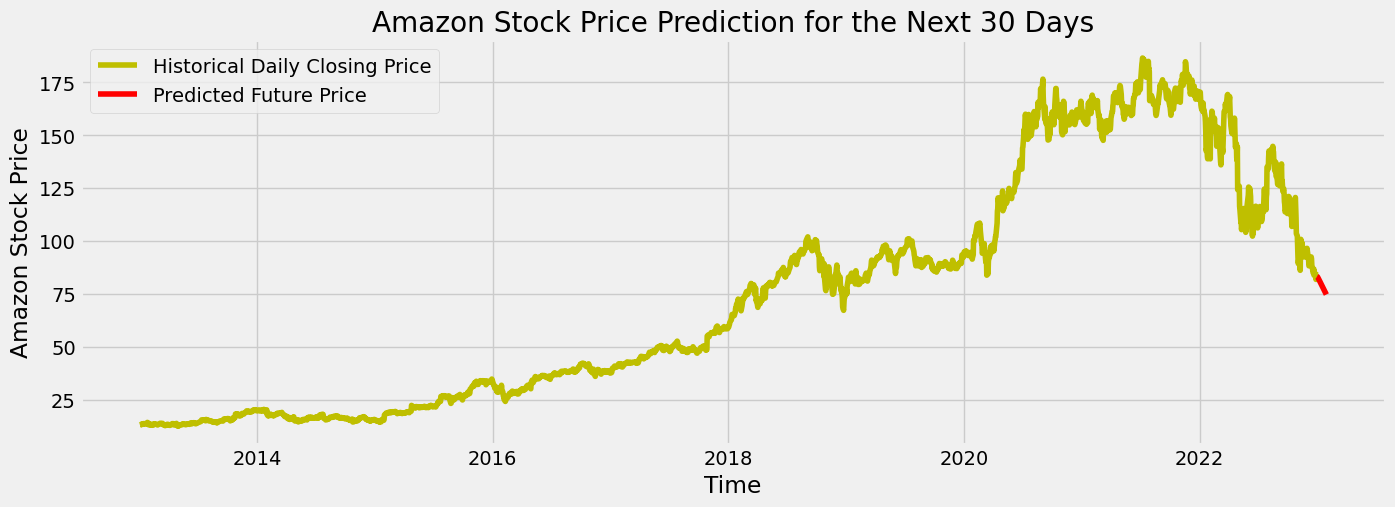

In [ ]:
# Plot the predictions
predicted_dates = pd.date_range(start=stock_data.index[-1], periods=days_to_predict + 1, closed='right')
plt.figure(figsize=(15,5))
plt.plot(stock_data.index, stock_data['Close'], color='y', label='Historical Daily Closing Price')
plt.plot(predicted_dates, future_days, color='r', label='Predicted Future Price')
plt.title(f'Amazon Stock Price Prediction for the Next {days_to_predict} Days')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()